<center><font size="5"><p style="text-align: center;"><b> Ising Model - Numerical Solutions </p></font></center>

## Task a)
First, we consider the Ising model in the "mean-field" approximation. To compute the magnetization m as a function of the magnetic field b, we have to solve non linear equations. Therefore we use the nsolve package from sympy.

In [114]:
import numpy as np
from numpy.random import rand
import sympy as sy
import matplotlib.pyplot as plt

In [115]:
j = 0.65
b_mf = np.arange(-1,1,10**-2)
m_mf = np.zeros((b_mf.size))

In [116]:
'''
for i in range(b_mf.size):
   m = sy.S('m')
   m_mf[i] = sy.nsolve(m-sy.tanh(b_mf[i]+4*j*m), (m), (-1.1,-0.1))
'''

"\nfor i in range(b_mf.size):\n   m = sy.S('m')\n   m_mf[i] = sy.nsolve(m-sy.tanh(b_mf[i]+4*j*m), (m), (-1.1,-0.1))\n"

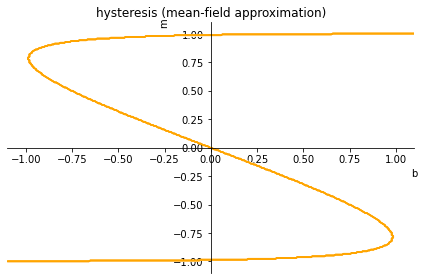

In [117]:
sy.var('x y')
sy.plot_implicit(y - sy.tanh(x + 4*j*y), (x,-1.1,1.1), (y,-1.1,1.1), xlabel='b', ylabel='m', adaptive=False, line_color="orange", title="hysteresis (mean-field approximation)")

## Task b)
Now we turn to the numerical solution using the Metropolis algorithm.

In [127]:
def initialstate(N):   
    # Generates a random spin configuration for initial condition
    state = 2*np.random.randint(2, size=(N,N))-1
    return state

In [131]:
def mcmove(config, beta):
    # Monte Carlo move using Metropolis algorithm 
    for i in range(N):
        for j in range(N):
            # Choose a random atom
            x = np.random.randint(0, N)
            y = np.random.randint(0, N)
            # Get the spin of the atom at position (x,y)
            spin =  config[x, y] 
            # Compute the impact of the neighbour atoms
            nb = config[(x+1)%N,y] + config[x,(y+1)%N] + config[(x-1)%N,y] + config[x,(y-1)%N]                      # Compute the energy difference                
            energy_difference = 2*spin*nb
            # Is Delta_E < 0, the new configuration is accepted
            if energy_difference < 0:
                spin *= -1
            # Is Delta_E > 0, the new configuration will only be accepted with a certain probability
            elif rand() < np.exp(-energy_difference*beta):
                spin *= -1
            config[x, y] = spin
    return config

In [129]:
def calcEnergy(config):
    # Energy of a given configuration
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            spin = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*spin
    return energy/4

In [130]:
def calcMag(config):
    # Magnetization of a given configuration
    mag = np.sum(config)
    return mag

Now we compute the mean energy〈e〉and magnetisation〈m〉per atom as a function of the magnetic field. Therefore we use a grid length of about 30, i.e. 900 atoms. 

In [ ]:
N_b     = 50         #  number of magnetic field points
N       = 30         #  size of the lattice, N x N
eqSteps = 1024       #  number of MC sweeps for equilibration
mcSteps = 1024       #  number of MC sweeps for calculation

b = np.linspace(-1,1,N_b)
e,b = np.zeros(N_b), np.zeros(N_b)
